In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import signals
import u

# Data Generation

<AxesSubplot:>

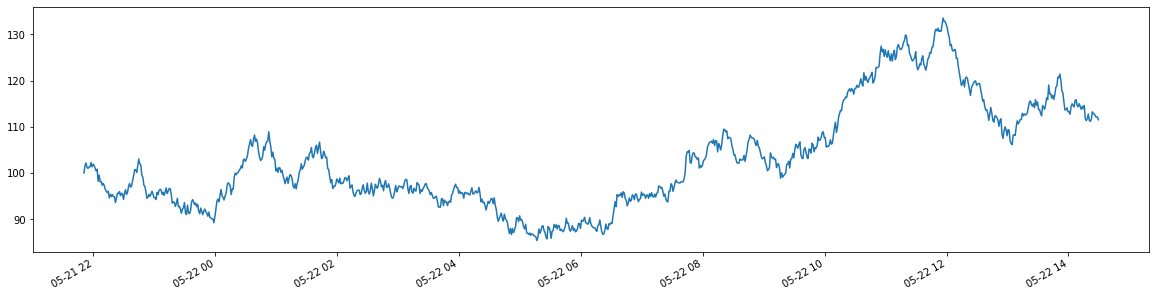

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = u.create_price_data(theta=0.0001, start_price=100, n_samples=1000)
data["close"].plot.line()

# CUSUM

In [4]:
indices = signals.get_cusum_indices(data["close"])

<AxesSubplot:>

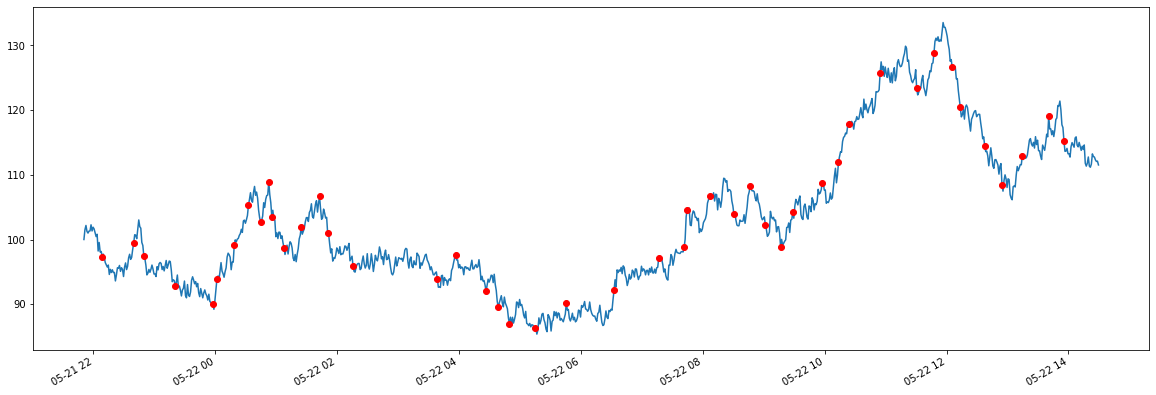

In [5]:
plt.rcParams["figure.figsize"] = (20, 7)

data["close"].plot.line()
(data["close"] * indices).replace(0, np.nan).plot(style="o", color="r")